# Preprocesamiento

Para responder las hipótesis planteadas se consideraron solamente las tablas de posts, usuarios y tags, eliminando las columnas de identificadores de las tablas  y ejecutando un query se obtuvieron nuevos atributos que se indican acontinuación. 

Para el análisis se obtuvieron 3 grupos de características:

**1. Características del usuario que realiza la pregunta**

Con la finalidad de determinar la influencia de la reputación y experiencia del usuario que plantea la pregunta se proponen las siguientes características:

La edad del usuario desde su registro hasta la fecha de creación del post, para ello se utilizaron los atributos: **users_creation_date**  y **post_creation_date** y el resultado es **user_age**.
* **users_reputation**: reputación del usuario obtenido del dataset.
* **users_up_votes**: obtenido del dataset
* **users_down_votes**: obtenido del dataset.
 
Adicionalmente se obtiene el score de las preguntas, respuestas y comentarios realizadas por el usuario previamente:
* **score_prev_acceptans**: sumatoria del score de las respuestas que ha dado el usuario y que se han marcado como aceptadas
* **score_prev_ans**: sumatoria del score de las respuestas que no han sido aceptadas.
* **score_prev_comment**: sumatoria del score de los comentarios realizados.
* **score_prev_question**: sumatoria del score de las preguntas.
* **score_prev_favquestion**: sumatoria de las marcas como favorito de las preguntas realizadas por el usuario. 

Para obtener estos atributos se eliminaron aquellos post que no tienen usuario registrado.

**2. Características del post**

Se obtuvo el tamaño del título como característica reemplazando a **post_title**:  
* **title_lenght**: número de caracteres

Además se obtuvieron características del cuerpo del post **post_body**:

* **num_block_code**: cantidad de bloques de código considerando el tag "pre"
* **code_lenght**: número de caracteres en los bloques de código
* **num_i_sentences**: número de oraciones que empiezan con “I”
* **num_wh_words**: número de oraciones que empiezan con  una pregunta. (How, What, etc.)
* **num_words**: número de palabras en el post, eliminando las "top words"
* **num_y_sentences**: número de oraciones que empiezan con “You”. Post que contienen una explicación previa.

Adicionalmente se mantienen algunas de las características obtenidas del dataset como:
* **post_comment_count**: número de comentarios.
* **post_favorite_count**: número de marcas como favorito.
* **post_score**: score de acuerdo a los up-votes.
* **post_view_count**: número de vistas.

**3. Características de Tag **

Cada post del dataset contiene los tags en una columna separados por el símbolo ‘|’. De la cual se obtiene el número de tags num_tags, y adicionalmente se evalúa la popularidad de cada tag tags_popularity.

La popularidad del tag se obtiene seleccionando los 100 top tags y contando cuantos de los tags de cada post se encuentran entre esos 100. 


El dataset contiene 5000 posts de los cuales se obtendrán las características para el análisis. 

In [21]:
from bs4 import BeautifulSoup
import pandas as pd

df=pd.read_csv("datos.csv", quotechar='"')
#Archivo con los tags más populares
df_tags=pd.read_csv("top_tags.csv", quotechar='"')
#Se elimina registros con valores nulos
df.dropna() 
df['post_creation_date']=pd.to_datetime(df['post_creation_date'])
df['users_creation_date']=pd.to_datetime(df['users_creation_date'])

In [22]:
df.head()
df.describe()

,post_id,post_owner_user_id,accepted_ans,post_answer_count,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,score_prev_comment,score_prev_question,score_prev_favquestion,class,user_numpost,user_numpost_answered
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.461580e+07,3.726968e+06,0.299450,0.775250,2.833850,0.202500,0.892850,399.968450,1171.291050,170.907800,16.1788,35.56555,63.003650,25.246950,12.674100,2.861250,0.500000,46.463000,40.257600
std,6.249510e+04,1.836321e+06,0.458029,1.018425,3.012457,1.706382,3.874793,2540.775961,8417.321886,698.433331,179.0697,554.64481,780.528884,227.321026,34.760876,9.487618,0.500013,111.379594,101.174985
min,3.455255e+07,9.100000e+01,0.000000,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.0000,-14.00000,-17.000000,0.000000,-17.000000,0.000000,0.000000,1.000000,0.000000
25%,3.456864e+07,2.087836e+06,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000
50%,3.458432e+07,4.170342e+06,0.000000,0.500000,2.000000,0.000000,0.000000,103.000000,93.000000,13.000000,0.0000,0.00000,1.000000,1.000000,2.000000,0.000000,0.500000,12.000000,9.000000
75%,3.465967e+07,5.536914e+06,1.000000,1.000000,4.000000,0.000000,1.000000,267.000000,560.000000,86.000000,2.0000,4.00000,11.000000,7.000000,9.000000,2.000000,1.000000,39.000000,32.000000
max,3.476502e+07,8.125198e+06,1.000000,22.000000,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,11788.0000,58871.00000,74441.000000,19977.000000,606.000000,233.000000,1.000000,2286.000000,2184.000000


In [44]:
#Se considera las features que se utilizarán en el clasificador. 
df2 = pd.DataFrame(data=df, index=df.index, columns=['class',
                            'post_comment_count',
                            'post_favorite_count', 'post_score',
                            'post_view_count',
                            'users_reputation','users_up_votes','users_down_votes',
                            'score_prev_acceptans' ,'score_prev_ans',
                            'score_prev_comment','score_prev_question',
                            'score_prev_favquestion','user_numpost','user_numpost_answered', 'post_answer_count']
                  )
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,score_prev_comment,score_prev_question,score_prev_favquestion,user_numpost,user_numpost_answered,post_answer_count
0,0,2,0,3,1279,1377,106,2,0,4,9,22,2,167,158,0
1,0,2,0,1,334,64,14,0,0,0,2,3,4,14,11,0
2,0,2,0,0,118,1,0,0,0,0,0,0,0,1,0,0
3,0,3,0,0,71,354,35,1,4,7,8,0,0,31,24,0
4,0,2,0,0,155,1,0,0,0,0,0,0,0,4,3,0


In [45]:
from nltk.corpus import stopwords


#Edad de creacion de la cuenta en relacion al post en dias.
df2['age_user'] = (df['post_creation_date'] - df['users_creation_date']).fillna(0).astype('timedelta64[D]')
df2['title_length'] = df['post_title'].apply(lambda x: len(x))
df2['num_block_code'] = 0
df2["num_i_sentences"]=0
df2["num_wh_words"]=0
df2["num_y_sentences"]=0
df2["tags_popularity"]=0
df2["num_tags"]=0

whwords=['what','how', 'which', 'when', 'why', 'where']
for index, row in df.iterrows():
    sbody=row["post_body"]
    soup = BeautifulSoup(sbody, "html5lib")
    sentences =  soup.find_all(name="p")
    urls =  soup.find_all('a', href=True)
    #Questions words
    count_wh=0
    #Oraciones que tienen el pronombre I
    count_is=0
    #Oraciones que tienen el pronombre You
    count_ys = 0
    palabras=[]
    filtered_words=[]
    for sentence in sentences:
        try:
            palabras=sentence.contents[0].split()
        except:
            palabras=str(sentence.contents).split() 
        if(len(palabras)==0):
            children = soup.find_all("li", { "class" : "expandable" }, recursive=False)
            for child in children:
                palabras.extend(child.getText().split())
        filtered_words.extend([word for word in palabras if word not in stopwords.words('english')])
        count_is=count_is+len([x for x in palabras if x == "I"])
        count_is=count_is+len([x for x in palabras if len(x.split("I'"))>1])    
        count_ys=count_ys+len([x for x in palabras if x == "You"])
        count_ys=count_ys+len([x for x in palabras if len(x.split("You'"))>1])
        for word in whwords:
            count_wh=count_wh+len([x for x in palabras if x == word])
    df2.loc[index, "num_i_sentences"] = count_is
    df2.loc[index, "num_wh_words"] = count_wh
    df2.loc[index, "num_y_sentences"] = count_ys    
    df2.loc[index, "num_words"] = len(filtered_words)
    df2.loc[index, "num_url"]=len(urls)

In [46]:
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,age_user,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url
0,0,2,0,3,1279,1377,106,2,0,4,...,1840.0,111,0,0,0,0,0,0,13.0,1.0
1,0,2,0,1,334,64,14,0,0,0,...,28.0,73,0,9,2,0,0,0,84.0,1.0
2,0,2,0,0,118,1,0,0,0,0,...,250.0,31,0,5,1,0,0,0,41.0,0.0
3,0,3,0,0,71,354,35,1,4,7,...,429.0,68,0,4,0,0,0,0,50.0,1.0
4,0,2,0,0,155,1,0,0,0,0,...,1.0,36,0,7,2,0,0,0,55.0,0.0


In [47]:
#Caracteristicas del codigo y tags
import string

for index, row in df.iterrows():
    body=row["post_body"]
    tags_column=row["post_tags"]
    tags=tags_column.split("|")
    if(body.find("error")>=0):        
        df2.loc[index, "post_error"] = 1
    else:
        df2.loc[index, "post_error"] = 0
    soup = BeautifulSoup(body, "html5lib")
    precode = soup.find_all("pre")
    df2.loc[index, "num_block_code"]=len(precode)
    content=""
    countError = 0
    for codeline in precode:
        contentPre = codeline.contents
        for contentCode in contentPre:
            try:
                content=content+contentCode.contents[0]
            except :
                try:
                    content = content + str(contentCode)
                except:
                    print(contentCode)
    wordCodeCount =len(content)
    df2.loc[index,"code_length"]=wordCodeCount    
    counttag=len(tags)
    pop_tag=0
    #numero de tags y popularidad del tag
    for tag in tags:
        if tag in df_tags['tag_name'].values:
            pop_tag+=1;
    df2.loc[index, "num_tags"] = counttag
    df2.loc[index, "tags_popularity"] = pop_tag
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
0,0,2,0,3,1279,1377,106,2,0,4,...,1,0,0,0,2,4,13.0,1.0,0.0,473.0
1,0,2,0,1,334,64,14,0,0,0,...,1,9,2,0,1,4,84.0,1.0,0.0,1192.0
2,0,2,0,0,118,1,0,0,0,0,...,0,5,1,0,1,2,41.0,0.0,0.0,0.0
3,0,3,0,0,71,354,35,1,4,7,...,0,4,0,0,2,5,50.0,1.0,0.0,0.0
4,0,2,0,0,155,1,0,0,0,0,...,7,7,2,0,1,2,55.0,0.0,0.0,1252.0


Se obtuvieron 22 características para el primer análisis. 

## ESTADÍSTICAS

In [49]:
#class 0: preguntas sin respuesta
#class 1: preguntas con respuesta

class0= df2.loc[df2['class'] ==0,:]
class1= df2.loc[df2['class'] ==1,:]
df2.to_csv("features3.csv", sep=',', encoding='utf-8')
df2.describe()


,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.500000,2.833850,0.202500,0.892850,399.968450,1171.291050,170.907800,16.1788,35.56555,63.003650,...,1.486750,3.675950,1.118950,0.013250,1.449400,3.057900,49.337800,0.411950,0.244900,1008.142150
std,0.500013,3.012457,1.706382,3.874793,2540.775961,8417.321886,698.433331,179.0697,554.64481,780.528884,...,1.419375,3.073502,1.346399,0.126788,0.981574,1.207527,40.344553,0.901603,0.430039,2024.448049
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.0000,-14.00000,-17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,0.000000,0.0000,0.00000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000
50%,0.500000,2.000000,0.000000,0.000000,103.000000,93.000000,13.000000,0.0000,0.00000,1.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,0.000000,0.000000,367.000000
75%,1.000000,4.000000,0.000000,1.000000,267.000000,560.000000,86.000000,2.0000,4.00000,11.000000,...,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1.000000,0.000000,1090.250000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,11788.0000,58871.00000,74441.000000,...,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,36.000000,1.000000,28847.000000


In [41]:
class0.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.0,3.477000,0.131500,0.685800,174.543300,897.997700,142.676200,11.737000,23.966100,44.840500,...,1.415100,3.797600,1.176900,0.01390,1.39980,3.117300,53.055900,0.43050,0.264700,1081.892700
std,0.0,2.913163,0.426645,1.232327,325.192738,4328.450672,537.803353,143.182333,192.377758,322.297152,...,1.411167,3.166929,1.394489,0.13232,0.98115,1.214779,44.110613,0.89925,0.441195,2185.065853
min,0.0,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,0.0,2.000000,0.000000,0.000000,42.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.00000,1.00000,2.000000,28.000000,0.00000,0.000000,0.000000
50%,0.0,3.000000,0.000000,0.000000,82.000000,79.000000,9.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,0.00000,1.00000,3.000000,43.000000,0.00000,0.000000,368.500000
75%,0.0,5.000000,0.000000,1.000000,193.000000,480.000000,69.000000,1.250000,3.000000,10.000000,...,2.000000,5.000000,2.000000,0.00000,2.00000,4.000000,67.000000,1.00000,1.000000,1165.250000
max,0.0,24.000000,13.000000,66.000000,12328.000000,141576.000000,14639.000000,11788.000000,6604.000000,11959.000000,...,19.000000,44.000000,14.000000,5.00000,5.00000,5.000000,1521.000000,17.00000,1.000000,28803.000000


In [42]:
class1.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,num_url,post_error,code_length
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,2.190700,0.273500,1.099900,625.393600,1444.584400,199.139400,20.620600,47.165000,81.166800,...,1.558400,3.554300,1.061000,0.012600,1.499000,2.998500,45.619700,0.393400,0.225100,934.391600
std,0.0,2.972678,2.373112,5.331525,3564.314395,11082.636086,827.550826,208.792908,760.272434,1055.450751,...,1.424006,2.972328,1.294004,0.121007,0.979538,1.197348,35.806861,0.903614,0.417669,1847.105174
min,1.0,0.000000,0.000000,-11.000000,7.000000,1.000000,0.000000,0.000000,-10.000000,-14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,60.000000,23.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,23.000000,0.000000,0.000000,48.000000
50%,1.0,1.000000,0.000000,0.000000,135.000000,110.000000,16.000000,0.000000,0.000000,1.000000,...,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,37.000000,0.000000,0.000000,365.000000
75%,1.0,3.000000,0.000000,1.000000,384.000000,663.250000,108.000000,3.000000,5.000000,12.000000,...,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,58.000000,1.000000,0.000000,1022.000000
max,1.0,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,10154.000000,58871.000000,74441.000000,...,13.000000,41.000000,12.000000,3.000000,5.000000,5.000000,796.000000,36.000000,1.000000,28847.000000


El dataset resultante tiene 5000 registros de los cuales:
* Clase 0: 1136 registros 
* Clase 1: 3864 registros

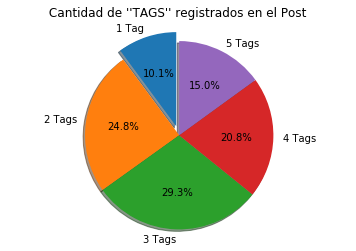

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataTag = df2[["tags_popularity", "num_tags"]]
totalTags = len(dataTag['num_tags'])

ar = np.array(dataTag['num_tags'])

g1 = ar[np.where(ar == 1)]
g2 = ar[np.where(ar == 2)]
g3 = ar[np.where(ar == 3)]
g4 = ar[np.where(ar == 4)]
g5 = ar[np.where(ar == 5)]

labels = '1 Tag', '2 Tags', '3 Tags', '4 Tags','5 Tags'
sizes = [len(g1) , len(g2), len(g3), len(g4) ,len(g5)]
explode = (0.1, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title(" Cantidad de ''TAGS'' registrados en el Post ")
plt.show()

**Figura 1 **: Diagrama Circular que representa la cantidad de "TAGS" con las que se registró un Posts.

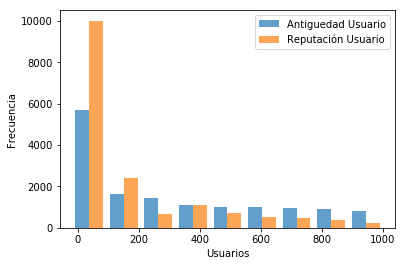

In [30]:
dataUsers = df2[['users_reputation','age_user','users_up_votes','users_down_votes']]

bins = np.linspace(-20,1000,10)
nums = np.vstack([dataUsers['age_user'],dataUsers['users_reputation']]).T
plt.hist(nums, bins, alpha=0.7, label=['Antiguedad Usuario', 'Reputación Usuario'])
plt.legend(loc='upper right')
plt.xlabel("Usuarios")
plt.ylabel("Frecuencia")
plt.show()

**Figura 2** : Diagrama de Barras que hace una comparación de la edad del usuario (dias), desde el momento en el que el usuario fue registrado en Stack Overflow y la reputación del usuario en la plataforma.

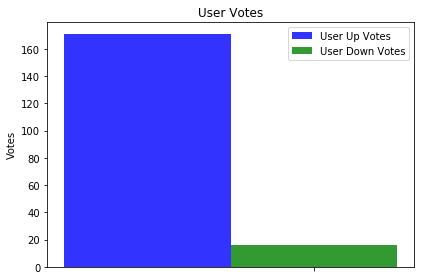

In [31]:
n_groups = 1
upVotes = np.array(dataUsers['users_up_votes'])
downVotes = np.array(dataUsers['users_down_votes'])

avgUp = np.average(upVotes)
avgDown = np.average(downVotes)

means_up = (avgUp)
means_down = (avgDown)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_up, bar_width,
                 alpha=opacity,
                 color='b',
                 label='User Up Votes')
 
rects2 = plt.bar(index + bar_width, means_down, bar_width,
                 alpha=opacity,
                 color='g',
                 label='User Down Votes')
 
plt.ylabel('Votes')
plt.title('User Votes')
plt.xticks(index + bar_width, ())
plt.legend()
 
plt.tight_layout()
plt.show()

**Figura 3 **: Gráfico de Barras que hace una comparación entre los votos a favor y los votos en contra que tienen los usuarios.

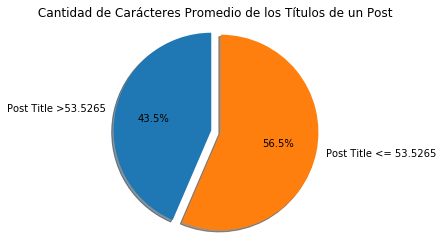

In [32]:
dataPosts = df2[['title_length','num_block_code','num_i_sentences','num_wh_words','num_y_sentences','code_length']]

res = dataPosts.describe().as_matrix()
promedios =[]
tipoPost = []

mayorPromedio = []
menorPromedio = []
for i in range(len(dataPosts.columns)):
    promedios.append(res[1][i])

    
def titleLength(a):
    for i in np.nditer(a):
        
        if( float(i) > promedios[0]):
            mayorPromedio.append(i)
        else:             
            menorPromedio.append(i)
            
    labels = 'Post Title >'+str(promedios[0]), 'Post Title <= '+str(promedios[0]) 
    sizes = [len(mayorPromedio), len(menorPromedio)]
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.set_title(" Cantidad de Carácteres Promedio de los Títulos de un Post ")
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    return plt.show()
                
titleLength(dataPosts['title_length'])

**Figura 4** : Cantidad de caracteres en promedio que tienen los títulos con los que se registró un post.

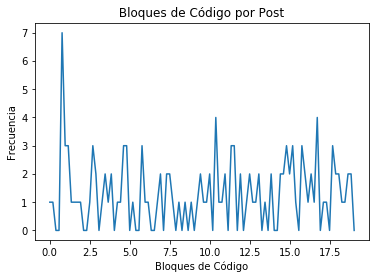

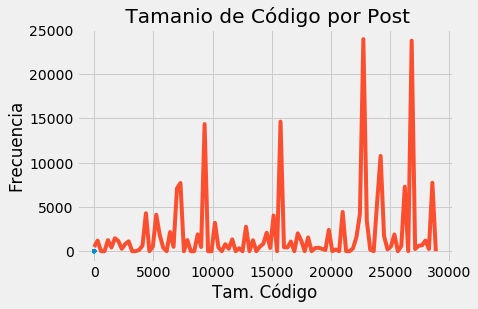

In [33]:
x = np.linspace(dataPosts['num_block_code'].values.min(),dataPosts['num_block_code'].values.max(),num=100)
x1 = np.linspace(dataPosts['code_length'].values.min(),dataPosts['code_length'].values.max(),num=100)

fig, ax = plt.subplots()

ax.plot(x, dataPosts['num_block_code'].head(100))
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Bloques de Código')
ax.set_title(" Bloques de Código por Post ")

plt.show()


with plt.style.context('fivethirtyeight'):
    plt.plot(x, dataPosts['num_block_code'].head(100))
    plt.plot(x1, dataPosts['code_length'].head(100))
    
    # Number of accent colors in the color scheme
    plt.title(' Tamanio de Código por Post')
    plt.xlabel('Tam. Código')
    plt.ylabel('Frecuencia')

plt.show()

**Figuras 5 y 6** : Representación de la cantidad de  Bloques y Tamanio de Código registrados en un Post.